# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# 2. Read the dataset

In [3]:
df = pd.read_csv("tweets.csv")


# 3. Split the dataset into X and y

In [5]:
y = df["author"]
X = df["status"]

# 4. Split the dataset into training set and testing set

In [6]:
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=0)


# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [7]:
count_vec = CountVectorizer()
word_count_vec = count_vec.fit_transform(X_train)
testcount= count_vec.transform(X_test)


In [8]:
print(testcount.toarray())


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [9]:
vectorizer = TfidfVectorizer()
trsfm=vectorizer.fit_transform(X_train)

In [10]:
testtfidf= vectorizer.transform(X_test)


In [11]:
print(testtfidf.toarray())


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [12]:
lcount=LogisticRegression()
ltfidf=LogisticRegression()

In [13]:
lcount.fit(word_count_vec,y_train)
ltfidf.fit(trsfm,y_train)

LogisticRegression()

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [14]:
s = SVC()
st = SVC()
s.fit(word_count_vec,y_train)
st.fit(trsfm,y_train)

SVC()

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [15]:
lcount_pred = lcount.predict(testcount)
ltfidf_pred = ltfidf.predict(testtfidf)
score_lgc = accuracy_score(y_test, lcount_pred)
score_lgc

0.88

In [16]:
score_lgt = accuracy_score(y_test, ltfidf_pred)
score_lgt

0.87

In [18]:
scount_pred = s.predict(testcount)
stfidf_pred = st.predict(testtfidf)
score_sc = accuracy_score(y_test, scount_pred)
score_sc

0.86

In [19]:
score_st = accuracy_score(y_test, stfidf_pred)
score_st

0.88

# 9. Plot a confusion matrix for both Logistic Regression and SVM

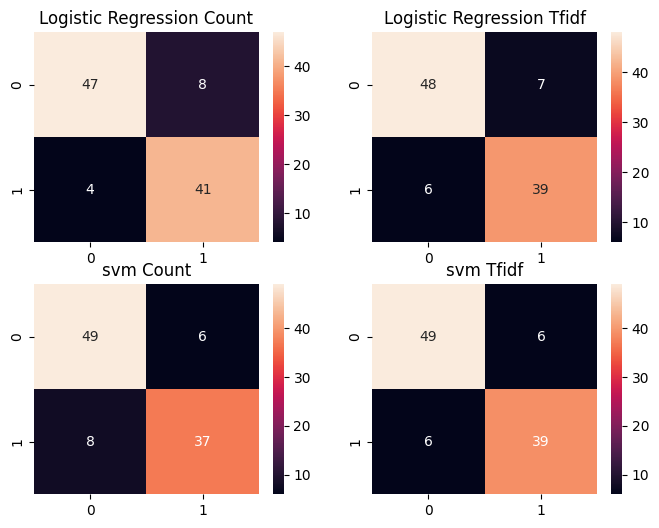

In [20]:
lcount_cm = confusion_matrix(y_test, lcount_pred)
ltfidf_cm = confusion_matrix(y_test, ltfidf_pred)
scount_cm = confusion_matrix(y_test, scount_pred)
stfidf_cm = confusion_matrix(y_test, stfidf_pred)
plt.figure(figsize=(8, 6))

plt.subplot(2, 2, 1)
sns.heatmap(lcount_cm, annot = True);
plt.title('Logistic Regression Count')

plt.subplot(2, 2, 2)
sns.heatmap(ltfidf_cm, annot = True);
plt.title('Logistic Regression Tfidf')

plt.subplot(2, 2, 3)
sns.heatmap(scount_cm, annot = True)
plt.title('svm Count')

plt.subplot(2, 2, 4)
sns.heatmap(stfidf_cm, annot = True);
plt.title('svm Tfidf')


plt.show()